## Machine Learning Nanodegree Capstone Project

#### Author: Quentin Thomas
#### Project: Error Detection Experiment
#### Date: 8/27/17



Below will be the entire process of building a error detection system. Each section will contain a different stage that the data will go through before finally showing a working example of how the system can be used to detect error messages in random web text.

### Importing Neccessary Libraries

The first step is to import all the neccessary libraries that will be needed throughout the entire process of building the machine learning system.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qthomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Everything we've downloaded is pretty standard for Machine Learning projects. The only thing that is different is the `re` library, and the `nltk` library. The `re` library will be used to work with regular expressions much more easily as our data will consists of text instead of numerical data. `nltk` Is also neccessary so that we can leverage the stopwords that will be needed during data preprocessing. The issue is we don't want to count words like or, the, it, and etc... in our algorithm as they don't tell us much so it is better not to utilize them.

### Data Exploration

We are attempting to solve a natrual language processing problem, so the dataset will be much different than numerical machine learning data, so there will be no need to get an idea of the standard deviation, mean, or other useful numerical related data from this dataset. Instead it makes more sense to Import the data and then explore it as is.

In [2]:
dataset = pd.read_csv('datasets/error_detection_training.tsv', delimiter='\t', quoting= 3)
print(dataset)

                                               Message  IsError?
0                                  Resource not found.         1
1                                     404 Error thrown         1
2    oops... There seems to be a problem loading th...         1
3    If you are up for some practical activities, h...         0
4    Accuracy obtained in the tutorial. But remembe...         0
5                               An error has occurred.         1
6                                       Page not found         1
7              He needs to learn the error of his ways         0
8    Websites have long played with fun 404 pages–t...         0
9    Although a user may not want a comedic error m...         0
10   Error 404: We couldn't find that page, sorry. ...         1
11                        503 Response from the server         1
12                                     400 bad request         1
13                                 Bad Gateway timeout         1
14                       

Our training set consists of two columns, one column represents the message and the other represents the `IsError` flag. Some of the messages are closely related to one another. For example **Applicaition pool unavailable** is clearly an error, but the algorithm should not confuse that with **Fill out the applicaiton in order to be a swim teacher at the pool**. Both of the statements contain some of the same keywords but they are in completely different contexts. We would like our algorithm to recognize the difference.

### Data PreProcessing & Tokenization

The most important initial step is to preprocess the data. Because we are working with text we intend to use the bag of words algorithm to combine together like terms. We will also need to stem each word within the message as we don't want to have multiple variations of the same word. We will need to import some helper libraries from `ntlk` in order to do this successfully and then we will define our data pre-processing function.

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
def preprocess_text(dataset, column):
    """The preprocess function takes a dataset of text which is a panda series.
       All datasets can be found in the `datasets/` directory. This function
       will be responsible for cleaning the text. The cleaning process will involve
       stemming the text in the data set and making all the terms lowercase as well
       as removing all the unneccessary stop words from the messages in the dataset.
       
       # Parameters
       - dataset : the dataset which could be one of the training files after being imported
       - column : a column from the training file, or dataset of interest For example 'Message'
       
    """
    messages = []
    for i in range(0, len(dataset)):
        message = re.sub('[^a-zA-Z0-9]', ' ', dataset[column][i])
        message = message.lower()
        message = message.split()
        ps = PorterStemmer()
        message = [ps.stem(text) for text in message if not text in set(stopwords.words('english'))]
        message = ' '.join(message)
        messages.append(message)
    return messages

Here we define our `preprocess_text` function which takes a dataset and a column.We wanted to generalize this as it is important to use this function again for different datasets. The function returns a cleaned version of the text. Note that we wanted to keep any digits that are in the text as error messages are sometimes known to have them. We would like the ability to keep those types of values in our messages as they might give us clues to whether or not something is an error. The output of the cleaned messages is shown below...

In [5]:
messages = preprocess_text(dataset, 'Message')
print(messages)

['resourc found', '404 error thrown', 'oop seem problem load page', 'practic activ littl challeng', 'accuraci obtain tutori rememb accuraci enough', 'error occur', 'page found', 'need learn error way', 'websit long play fun 404 page error page get', 'although user may want comed error messag credit card number correct situat might nice funni', 'error 404 find page sorri found', '503 respons server', '400 bad request', 'bad gateway timeout', 'servic unavail', 'felt unavail met new teacher', '500 intern servic error', 'sorri page unavail', '404 found', 'presid speak chri', 'spoken made comment valu well speech gave state depart past week', 'someth went wrong', 'error messag occur', 'net sendpaket error', 'someth bad happen', 'comput start care tv', 'error messag inform display unexpect condit occur', 'window fail start', 'connect fail', 'confin color languag wrongli enter password', 'part pretti straightforward error messag get end doubl take', 'fail startup ssh session', 'file found', '

As we can see the messages look much different than before because we applied the stemmer. We also kept our error codes in the text as they can serve as context clues for the algorithm to determine context.

### Tokenization (Bag Of Words)

Next we will implement the bag of words so that we can group together like terms for the algorithm. We also want to reduce the number of features that we want the algorithm to use as the more features we have the slower the performance. We want to avoid the curse of dimensionality. As a result we will write a new bag of words and pass our messages as an argument. First we need to import the neccessary libraries.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
def bag_of_words(messages, max_features_count):
    """Takes a list of cleaned text and max features count in order to reduce dimensionality of the matrix
       It returns the vectorized data set with the given amount of features
       # Parameters
       - messages [list]: a list of all the cleaned text
       - max_features_count: a tweakable amount of max features that can be tweaked for training purposes.
    """
    #max_features = max_features_count
    cv = CountVectorizer(max_features= max_features_count)
    X = cv.fit_transform(messages).toarray()
    return X

Here we create a new function called `bag_of_words` which is responsible for taking the messages and reducing the dimensionality of the data. It will then return the vectorized version of the dataset that can be fed to the model.

In [8]:
X = bag_of_words(messages, len(messages))
print(X.shape)

(500, 500)


Here we reduced our dataset down to a sparse `500x500` It could be possible that we would need to lower the dimensionality further, but we will start here with the training of the algorithm. First, we will need the Expected values from the dataset so that it can be fed into the Naive Bayes Classifier.

In [9]:
y = dataset.iloc[:, 1].values
print(y)

[1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 

### Training the Model

Now that we have successfully preprocessed the data we will then look to train our first algorithm. We would like to utilize the Naive Bayes as our benchmark and see if we can obtain a 60% accuracy as our target point. Before we do that we will split the training data up and hold out some for the test set.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 111)

Now that we have our training data split we are ready to begin training our classifier. As mentioned in the proposal our first attempt will be the `Naive Bayes` Algorithm as it is usually the standard algorithm for text classification. Our goal is to get at least a 60% Accuracy.


In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

Now that we have trained our model we will evaluate the performance of the model on the test set.

### Evaluating The Model

As mentioned in the proposal we will be leveraging a confusion matrix to get the accuracy of the Naive Bayes classifier we have trained. This will give us an idea of whether or not we have reached our accuracy of 60% we've been hunting for. The next section will show our metrics for the Naive Bayes algorithm.


In [12]:
nb_y_preds = nb.predict(X_test)

from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_preds)

print(nb_cm)

[[39 15]
 [ 7 39]]


Our confusion matrix for the Naive Bayes Model shows that we got 22 incorrect predictions out of 100. This gives us an accuracy of roughly 78% on the test set. In order to get a closer look at the accuracy we have obtained we utilized the accuracy score from sklearn to verify further.

In [13]:
from sklearn.metrics import accuracy_score

nb_score = accuracy_score(y_test, nb_y_preds)
print("The Naive Bayes Algorithm had an accuracy of {0}%".format(nb_score))

The Naive Bayes Algorithm had an accuracy of 0.78%


### Saving The Model

We have passed our threshold of 60% by a large margin, so we would very much like to save this model so that we might be able to compare it to another. The next cell shows our general function for saving our models during this process, as it is possible we will try another classifier like the random forest classifier to see if it can beat the naive bayes.

In [14]:
from sklearn.externals import joblib

def save_classifier(model, name):
    """A generic function to make it easier to save models"""
    joblib.dump(model, 'best_models/' + name + '.pkl')
    print("Model Saved Successfully.")


In [15]:
save_classifier(nb, "ErrorDetectionNB")

Model Saved Successfully.


---

### Trying another Model

It is possible that there is another model that will perform better than the `Naive Bayes Classifier` we've chose to get the accuracy greater than 60%. As mentioned in our proposal we wanted to see if the performance could be pushed to an even better place, so we set out to test what would happen if we did a grid search on our random forest hyper parameters and then we fed them to the algorithm. 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_class = RandomForestClassifier(random_state=111)
params = {
    'n_estimators': [10, 20, 30],
    'max_features': [2, 100, 300, 500],
    'max_depth': [5, 10, 15]
}

rf_cv = GridSearchCV(estimator=rf_class, param_grid=params, cv=10, n_jobs=4)

Now that we've set up grid search with random forest, we will once again use the dataset to train our new model on the dataset.

In [17]:
rf = rf_cv.fit(X_train, y_train)

Now that we've trained our new model we will take a quick look at the best parameters it found during training..

In [18]:
print(rf.best_params_)
print(rf.best_score_)

{'max_depth': 15, 'max_features': 500, 'n_estimators': 20}
0.76


We can see here that the best parameters to use are a max depth of 15, while using 300 maximum features. The number of estimators it said to use was 20. This approach gave it an accuray of 75% during training which is still better than the 60% we set out to acheive. Now its time to make predictions with the new model and make a final evaluation.

### New Model Evaluation

The new model will now need to be tested to verify how it stands up to the Naive Bayes Classifier Utilizing the feedback we got from our grid search algorithm. Below is what we've found after evaluating the new model...

In [19]:
from sklearn.ensemble import RandomForestClassifier
new_rf = RandomForestClassifier(random_state = 111, max_depth= 15, max_features=500, n_estimators=20)
new_rf.fit(X_train, y_train)
rf_y_preds = new_rf.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_y_preds)

print(rf_cm)

[[49  5]
 [ 8 38]]


The confusion matrix above shows that the Random Forest classifier had a better performance on the test set than the Naive Bayes classifier had. The actual accuracy was obtained by running the code below...


In [20]:
rf_score = accuracy_score(y_test, rf_y_preds)
print("The Random Forest classifier had an accuracy score of {0}%".format(rf_score))
save_classifier(new_rf, 'ErrorDetectionRF')

The Random Forest classifier had an accuracy score of 0.87%
Model Saved Successfully.


Now we check the importances of the features in this next section to find out how many of them were relevant to the algorithm during classifcation.

Random Forest Feature Ranking:
1. feature 382 (0.059234)
2. feature 340 (0.050357)
3. feature 273 (0.039133)
4. feature 261 (0.037362)
5. feature 387 (0.035282)
6. feature 435 (0.033463)
7. feature 147 (0.033068)
8. feature 438 (0.032008)
9. feature 193 (0.030726)
10. feature 116 (0.030142)
11. feature 364 (0.026316)
12. feature 79 (0.023778)
13. feature 95 (0.023769)
14. feature 131 (0.023197)
15. feature 142 (0.017931)
16. feature 237 (0.017101)
17. feature 224 (0.015909)
18. feature 419 (0.014699)
19. feature 268 (0.014659)
20. feature 199 (0.013327)
21. feature 125 (0.013296)
22. feature 153 (0.013175)
23. feature 379 (0.012806)
24. feature 109 (0.012657)
25. feature 240 (0.011943)
26. feature 444 (0.011137)
27. feature 6 (0.010723)
28. feature 442 (0.010355)
29. feature 487 (0.010280)
30. feature 177 (0.008258)
31. feature 342 (0.008117)
32. feature 74 (0.007898)
33. feature 232 (0.007231)
34. feature 421 (0.007162)
35. feature 101 (0.006959)
36. feature 137 (0.006953)
37. feature

354. feature 470 (0.000000)
355. feature 473 (0.000000)
356. feature 474 (0.000000)
357. feature 475 (0.000000)
358. feature 476 (0.000000)
359. feature 477 (0.000000)
360. feature 478 (0.000000)
361. feature 480 (0.000000)
362. feature 429 (0.000000)
363. feature 481 (0.000000)
364. feature 482 (0.000000)
365. feature 484 (0.000000)
366. feature 488 (0.000000)
367. feature 489 (0.000000)
368. feature 490 (0.000000)
369. feature 493 (0.000000)
370. feature 494 (0.000000)
371. feature 495 (0.000000)
372. feature 497 (0.000000)
373. feature 466 (0.000000)
374. feature 465 (0.000000)
375. feature 462 (0.000000)
376. feature 461 (0.000000)
377. feature 430 (0.000000)
378. feature 432 (0.000000)
379. feature 433 (0.000000)
380. feature 436 (0.000000)
381. feature 437 (0.000000)
382. feature 439 (0.000000)
383. feature 440 (0.000000)
384. feature 441 (0.000000)
385. feature 443 (0.000000)
386. feature 445 (0.000000)
387. feature 447 (0.000000)
388. feature 448 (0.000000)
389. feature 449 (0.

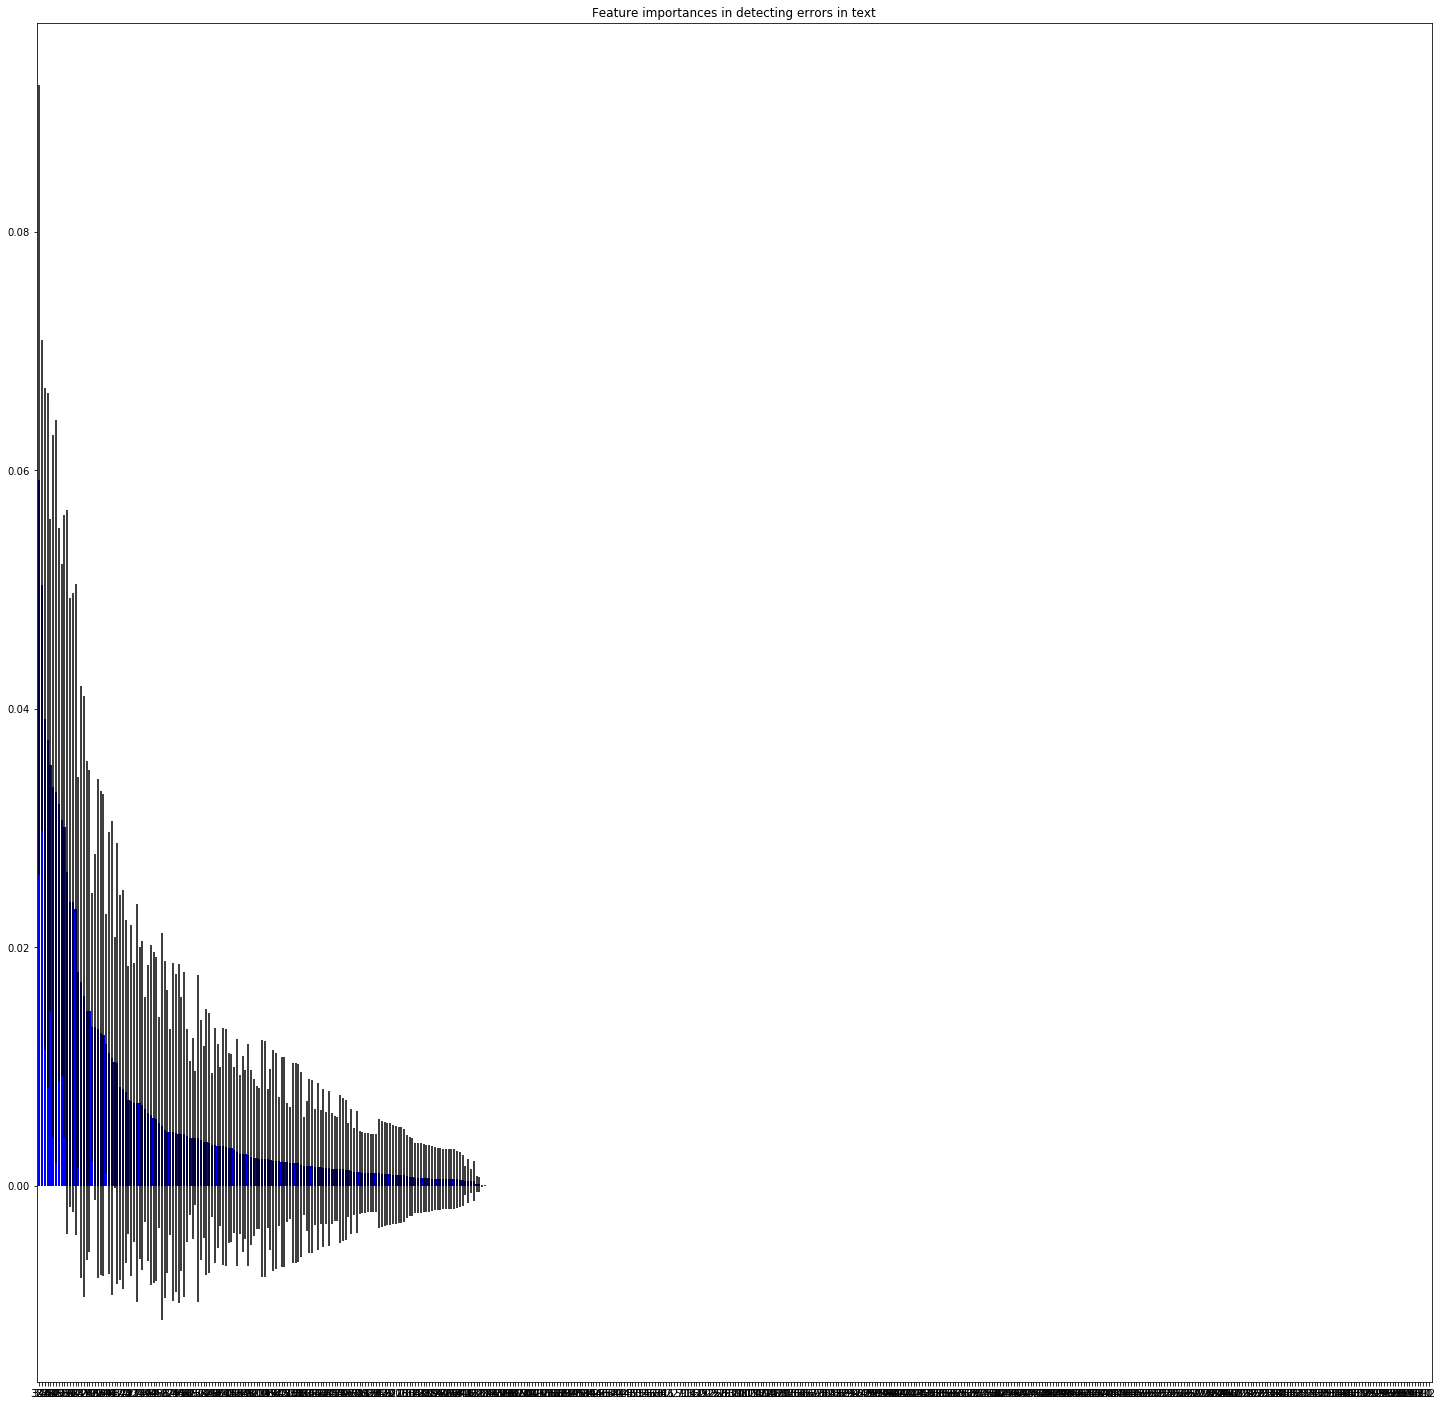

In [25]:
importances = new_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in new_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Random Forest Feature Ranking:")
for feature in range(X.shape[1]):
    print("%d. feature %d (%f)" %(feature + 1, indices[feature], importances[indices[feature]]))

plt.figure(figsize=(25,25))
plt.title("Feature importances in detecting errors in text")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Now we have a working model that is best fit for an error detector classifier.

---


### Conclusion

We can conclude that it is possible to build a error detection system that has the ability to decipher error messages form the web or any other place it may encounter error text. We have shown that the best algorthm for this problem is The `RandomForestClassifier` as it showed a higher accuracy score on the test set than the Naive Bayes classifier. Some things to try in the future are experiementing with more data, and perhaps error messages in other languages as this model was only designed to work for english based error messages.

---